In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D

In [2]:
def plot_mean_and_std(dfs, lambdas, col="diverted", ytitle="Media"):
    x = []
    y_mean = []
    y_std = []

    for i, df in enumerate(dfs):
        x.append(lambdas[i])
        y_mean.append(df[col].mean())
        y_std.append(df[col].std())

    # --- Gráfico ---
    plt.plot(x, y_mean, linestyle="-", color="dodgerblue")
    plt.errorbar(x, y_mean, yerr=y_std, fmt="none", ecolor="navy", capsize=4)
    plt.scatter(x, y_mean, color="navy", zorder=3)

    plt.xlabel("λ")
    plt.ylabel(ytitle)

    # --- Crear entradas personalizadas para la leyenda ---
    legend_entries = [
        Line2D([0], [0], color="none", label=f"Error para λ={lam}: {err:.3f}")
        for lam, err in zip(lambdas, y_std)
    ]

    plt.legend(handles=legend_entries, title="Desvíos estándar", loc="best")



    plt.tight_layout()
    plt.show()


In [3]:
data = {}
with open("exercise_6_results.pkl", "rb") as f:
    data = pickle.load(f)
dfs = [pd.DataFrame(data[i]["numeric_results"]) for i in range(len(data))]
lambdas = [0.02, 0.1, 0.2, 0.5, 1]
dts = [pd.DataFrame(data[i]["simulation_stats"]) for i in range(len(data))]

In [4]:
for i in range(len(dfs)):
    dfs[i]["reposition_prop"] = dfs[i]["reposition_count"] / dfs[i]["total_planes"]
    dfs[i]["landed_prop"] = dfs[i]["landed"] / dfs[i]["total_planes"]
    dfs[i]["diverted_prop"] = dfs[i]["diverted"] / dfs[i]["total_planes"]

In [5]:
for i in range(len(dts)):
    dts[i]["mean_delay_all"] = dts[i]["mean_flight_time_all"] - 23
    dts[i]["mean_delay_landed"] = dts[i]["mean_flight_time_landed"] - 23

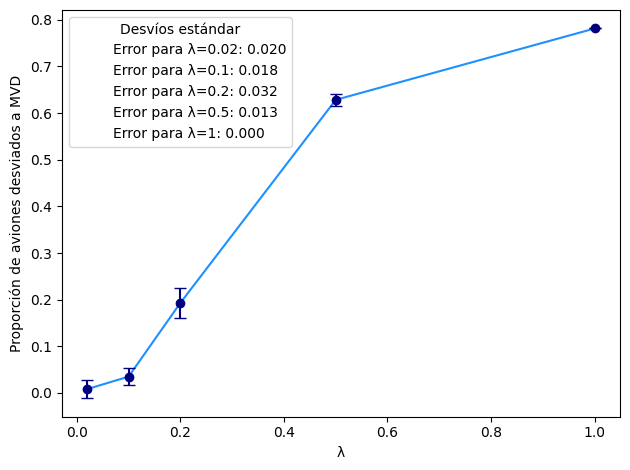

In [11]:
plot_mean_and_std(dfs, lambdas, "diverted_prop", "Proporción de aviones desviados a MVD")

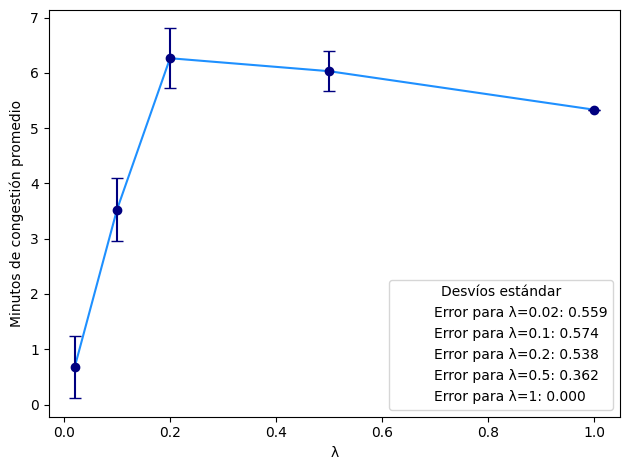

In [8]:
plot_mean_and_std(dts, lambdas, "mean_congestion_landed", "Minutos de congestión promedio")

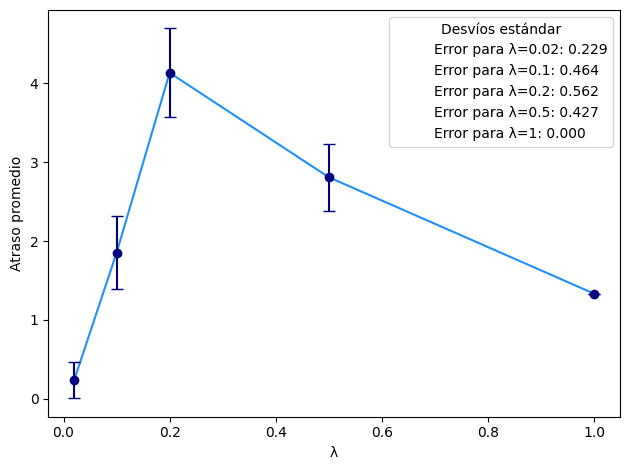

In [9]:
plot_mean_and_std(dts, lambdas, "mean_delay_landed", "Atraso promedio")

In [10]:
dfs[1]["diverted"].mean()

np.float64(3.847)